# Regression with Basis functions

## Generate data

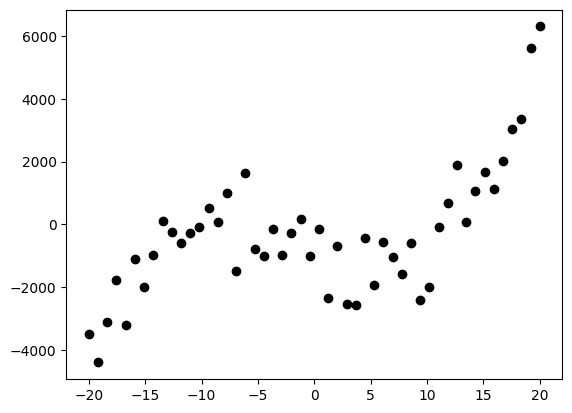

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Polynomial function
def f(x,N):
    y = (x+9) * (x-13) * (x+9) + np.random.randn(N) * 1000
    return y

# Parameters
N = 50
x = np.linspace(-20,20,N)
y = f(x,N)

# Plot
plt.scatter(x,y,c='black')

## Fixed basis points

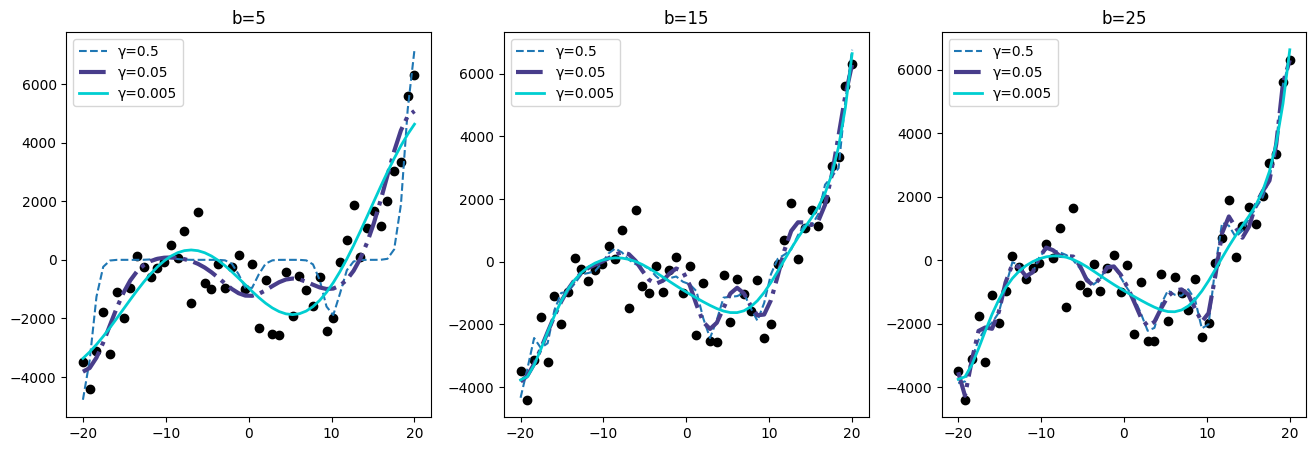

In [3]:
# b - base points, γ - regularization
γ_1 = 0.5
γ_2 = 0.05
γ_3 = 0.005

b_1 = np.linspace(-20,20,5)
b_2 = np.linspace(-20,20,15)
b_3 = np.linspace(-20,20,25)

dist_1 = np.abs(x[:, np.newaxis] - b_1)
dist_2 = np.abs(x[:, np.newaxis] - b_2)
dist_3 = np.abs(x[:, np.newaxis] - b_3)

Φ_1_1 = np.exp(-γ_1 * dist_1 ** 2)
Φ_1_2 = np.exp(-γ_1 * dist_2 ** 2)
Φ_1_3 = np.exp(-γ_1 * dist_3 ** 2)

Φ_2_1 = np.exp(-γ_2 * dist_1 ** 2)
Φ_2_2 = np.exp(-γ_2 * dist_2 ** 2)
Φ_2_3 = np.exp(-γ_2 * dist_3 ** 2)

Φ_3_1 = np.exp(-γ_3 * dist_1 ** 2)
Φ_3_2 = np.exp(-γ_3 * dist_2 ** 2)
Φ_3_3 = np.exp(-γ_3 * dist_3 ** 2)


# Calculate w 
w_1_1 = np.linalg.solve(Φ_1_1.T @ Φ_1_1, Φ_1_1.T @ y)
w_1_2 = np.linalg.solve(Φ_1_2.T @ Φ_1_2, Φ_1_2.T @ y)
w_1_3 = np.linalg.solve(Φ_1_3.T @ Φ_1_3, Φ_1_3.T @ y)

w_2_1 = np.linalg.solve(Φ_2_1.T @ Φ_2_1, Φ_2_1.T @ y)
w_2_2 = np.linalg.solve(Φ_2_2.T @ Φ_2_2, Φ_2_2.T @ y)
w_2_3 = np.linalg.solve(Φ_2_3.T @ Φ_2_3, Φ_2_3.T @ y)

w_3_1 = np.linalg.solve(Φ_3_1.T @ Φ_3_1, Φ_3_1.T @ y)
w_3_2 = np.linalg.solve(Φ_3_2.T @ Φ_3_2, Φ_3_2.T @ y)
w_3_3 = np.linalg.solve(Φ_3_3.T @ Φ_3_3, Φ_3_3.T @ y)

# y
y_b_1 = Φ_1_1 @ w_1_1
y_b_2 = Φ_1_2 @ w_1_2
y_b_3 = Φ_1_3 @ w_1_3

y_b_4 = Φ_2_1 @ w_2_1
y_b_5 = Φ_2_2 @ w_2_2
y_b_6 = Φ_2_3 @ w_2_3

y_b_7 = Φ_3_1 @ w_3_1
y_b_8 = Φ_3_2 @ w_3_2
y_b_9 = Φ_3_3 @ w_3_3

# Plot
fig, ax = plt.subplots(1,3,figsize=(16,5))

ax[0].scatter(x,y,c='black')
ax[0].plot(x, y_b_1, label=('γ=' + str(γ_1)), linestyle='--')
ax[0].plot(x, y_b_4,c='darkslateblue', label=('γ=' + str(γ_2)), linestyle="-.", linewidth=3)
ax[0].plot(x, y_b_7,c='darkturquoise', label=('γ=' + str(γ_3)), linewidth=2)
ax[0].set_title('b=5')
ax[0].legend()


ax[1].scatter(x,y,c='black')
ax[1].plot(x, y_b_2, label=('γ=' + str(γ_1)), linestyle='--')
ax[1].plot(x, y_b_5,c='darkslateblue', label=('γ=' + str(γ_2)), linestyle="-.", linewidth=3)
ax[1].plot(x, y_b_8,c='darkturquoise', label=('γ=' + str(γ_3)), linewidth=2)
ax[1].set_title('b=15')
ax[1].legend()

ax[2].scatter(x,y,c='black')
ax[2].plot(x, y_b_3, label=('γ=' + str(γ_1)), linestyle='--')
ax[2].plot(x, y_b_6,c='darkslateblue', label=('γ=' + str(γ_2)), linestyle="-.", linewidth=3)
ax[2].plot(x, y_b_9,c='darkturquoise', label=('γ=' + str(γ_3)),linewidth=2)
ax[2].set_title('b=25')
ax[2].legend()

## Basis points from data points

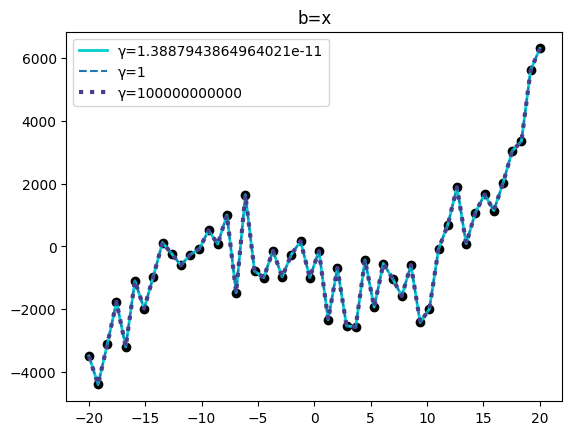

In [9]:
# b - base points
b_num = N
b = np.linspace(-20,20,b_num)

# γ - regularization
γ_1 = 10 ** 11
γ_2 = 1
γ_3 = np.exp(-5 ** 2)

# Φ transformation
dist = np.abs(x[:, np.newaxis] - b)
Φ_1 = np.exp(-γ_1 * dist ** 2)
Φ_2 = np.exp(-γ_2 * dist ** 2)
Φ_3 = np.exp(-γ_3 * dist ** 2)


# Calculate w 
w_1 = np.linalg.solve(Φ_1.T @ Φ_1, Φ_1.T @ y)
w_2 = np.linalg.solve(Φ_2.T @ Φ_2, Φ_2.T @ y)
w_3 = np.linalg.solve(Φ_3.T @ Φ_3, Φ_3.T @ y)

# y
y_b_1 = Φ_1 @ w_1
y_b_2 = Φ_1 @ w_1
y_b_3 = Φ_1 @ w_1

# Plot
plt.scatter(x,y,c='black')
plt.plot(x, y_b_3, 'darkturquoise', label=('γ=' + str(γ_3)),linewidth=2)
plt.plot(x, y_b_2, label=('γ=' + str(γ_2)), linestyle="--")
plt.plot(x, y_b_1, c='darkslateblue', label=('γ=' + str(γ_1)), linestyle=":", linewidth=3)
plt.title('b=x')
plt.legend()